# EDA Credit History

In [1]:
import pandas as pd

# Imported the data
df_credit_history = pd.read_csv('../data/created_data/credit_history.csv')
#df_credit_history = pd.read_csv('/content/credit_history.csv')
display(df_credit_history.head())

C:\Users\zeynep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,earliest_cr_line,fico_range_low,fico_range_high,last_fico_range_low,last_fico_range_high,inq_last_6mths,inq_last_12m,inq_fi,total_cu_tl,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc.1,pct_tl_nvr_dlq,percent_bc_gt_75
0,68407277,Aug-2003,675.0,679.0,560.0,564.0,1.0,4.0,3.0,1.0,...,9.0,4.0,7.0,148.0,128.0,3.0,3.0,1.0,76.9,0.0
1,68355089,Dec-1999,715.0,719.0,695.0,699.0,4.0,6.0,0.0,0.0,...,27.0,5.0,22.0,113.0,192.0,2.0,2.0,4.0,97.4,7.7
2,68341763,Aug-2000,695.0,699.0,700.0,704.0,0.0,1.0,2.0,5.0,...,7.0,3.0,6.0,125.0,184.0,14.0,14.0,5.0,100.0,50.0
3,66310712,Sep-2008,785.0,789.0,675.0,679.0,0.0,0.0,0.0,1.0,...,13.0,5.0,13.0,36.0,87.0,2.0,2.0,1.0,100.0,0.0
4,68476807,Jun-1998,695.0,699.0,700.0,704.0,3.0,3.0,2.0,1.0,...,19.0,6.0,12.0,128.0,210.0,4.0,4.0,6.0,96.6,60.0


In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
print(df_credit_history.columns.tolist())

['id', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'last_fico_range_low', 'last_fico_range_high', 'inq_last_6mths', 'inq_last_12m', 'inq_fi', 'total_cu_tl', 'acc_open_past_24mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mort_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'total_bc_limit', 'total_il_high_credit_limit', 'all_util', 'max_bal_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc.1', 'pct_tl_nvr_dlq', 'percent_bc_gt_75']


In [3]:
df_credit_history.shape

(2260701, 43)

In [4]:
# id is pk ?
is_id_unique = df_credit_history['id'].is_unique
print(f"Is the 'id' column in df_credit_history unique? {is_id_unique}")

Is the 'id' column in df_credit_history unique? True


In [5]:
null_ids = df_credit_history['id'].isnull().sum()
print(f"Number of null values in 'id' column: {null_ids}")

Number of null values in 'id' column: 0


In [6]:
df_credit_history['id'].shape[0]

2260701

In [7]:
# Check null values per column (full)
print("Checking for columns where all values are null in df_credit_history...")
null_columns_all = df_credit_history.columns[df_credit_history.isnull().all()].tolist()

if null_columns_all:
    print("Columns where all values are null:")
    for col in null_columns_all:
        print(f"- {col}")
else:
    print("No columns found where all values are null.")

Checking for columns where all values are null in df_credit_history...
No columns found where all values are null.


In [8]:
# Number of null values per column
display(df_credit_history.isnull().sum())

id                                 0
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
last_fico_range_low               33
last_fico_range_high              33
inq_last_6mths                    63
inq_last_12m                  866163
inq_fi                        866162
total_cu_tl                   866163
acc_open_past_24mths           50063
open_acc                          62
pub_rec                           62
revol_bal                         33
revol_util                      1835
total_acc                         62
avg_cur_bal                    70379
bc_open_to_buy                 74968
bc_util                        76104
mort_acc                       50063
tot_coll_amt                   70309
tot_cur_bal                    70309
total_rev_hi_lim               70309
total_bc_limit                 50063
total_il_high_credit_limit     70309
all_util                      866381
max_bal_bc                    866162
n

In [9]:
# Percentage of null values per column
null_percentage = (df_credit_history.isnull().sum() / len(df_credit_history)) * 100
formatted_null_percentage = null_percentage.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
display(formatted_null_percentage)

all_util                      38.32%
inq_last_12m                  38.31%
total_cu_tl                   38.31%
max_bal_bc                    38.31%
inq_fi                        38.31%
mo_sin_old_il_acct             6.15%
bc_util                        3.37%
percent_bc_gt_75               3.34%
bc_open_to_buy                 3.32%
pct_tl_nvr_dlq                 3.12%
avg_cur_bal                    3.11%
mo_sin_old_rev_tl_op           3.11%
mo_sin_rcnt_rev_tl_op          3.11%
num_rev_accts                  3.11%
num_rev_tl_bal_gt_0            3.11%
total_il_high_credit_limit     3.11%
num_op_rev_tl                  3.11%
num_il_tl                      3.11%
num_bc_tl                      3.11%
num_actv_rev_tl                3.11%
mo_sin_rcnt_tl                 3.11%
num_actv_bc_tl                 3.11%
tot_cur_bal                    3.11%
total_rev_hi_lim               3.11%
tot_coll_amt                   3.11%
num_bc_sats                    2.59%
num_sats                       2.59%
t

In [10]:
display(df_credit_history.describe().round(2))

,fico_range_low,fico_range_high,last_fico_range_low,last_fico_range_high,inq_last_6mths,inq_last_12m,inq_fi,total_cu_tl,acc_open_past_24mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_bc_limit,total_il_high_credit_limit,all_util,max_bal_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc.1,pct_tl_nvr_dlq,percent_bc_gt_75
count,2260668.00,2260668.00,2260668.00,2260668.00,2260638.00,1394538.00,1394539.00,1394538.00,2210638.00,2260639.00,2260639.00,2260668.00,2258866.00,2260639.00,2190322.00,2185733.00,2184597.00,2210638.00,2190392.00,2190392.00,2190392.00,2210638.00,2190392.00,1394320.00,1394539.00,2190392.00,2190392.00,2202078.00,2190392.00,2190392.00,2190392.00,2190391.00,2190392.00,2202078.00,2121597.00,2190391.00,2190391.00,2190392.00,2210638.00,2190237.00,2185289.00
mean,698.59,702.59,675.54,687.66,0.58,2.04,1.01,1.48,4.52,11.61,0.20,16658.46,50.34,24.16,13547.80,11394.26,57.90,1.56,232.73,142492.20,34573.94,23193.77,43732.01,57.03,5806.39,3.68,5.63,4.77,7.73,8.41,8.25,14.00,5.58,11.63,125.74,181.49,14.02,8.30,1.56,94.11,42.44
std,33.01,33.01,111.10,72.97,0.89,2.38,1.49,2.67,3.16,5.64,0.57,22948.31,24.71,11.99,16474.08,16599.53,28.58,1.90,8518.46,160692.64,36728.50,23006.56,45072.98,20.90,5690.56,2.32,3.38,3.04,4.70,7.36,4.68,8.04,3.29,5.64,53.38,97.12,17.53,9.21,1.90,9.04,36.22
min,610.00,614.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,675.00,679.00,650.00,654.00,0.00,0.00,0.00,0.00,2.00,8.00,0.00,5950.00,31.50,15.00,3080.00,1722.00,35.40,0.00,0.00,29092.00,14700.00,8300.00,15000.00,43.00,2284.00,2.00,3.00,3.00,4.00,3.00,5.00,8.00,3.00,8.00,96.00,116.00,4.00,3.00,0.00,91.30,0.00
50%,690.00,694.00,695.00,699.00,0.00,1.00,1.00,0.00,4.00,11.00,0.00,11324.00,50.30,22.00,7335.00,5442.00,60.20,1.00,0.00,79240.00,25400.00,16300.00,32696.00,58.00,4413.00,3.00,5.00,4.00,7.00,6.00,7.00,12.00,5.00,11.00,130.00,164.00,8.00,6.00,1.00,100.00,37.50
75%,715.00,719.00,730.00,734.00,1.00,3.00,1.00,2.00,6.00,14.00,0.00,20246.00,69.40,31.00,18783.00,14187.00,83.10,3.00,0.00,213204.00,43200.00,30300.00,58804.25,72.00,7598.00,5.00,7.00,6.00,10.00,11.00,10.00,18.00,7.00,14.00,154.00,232.00,17.00,11.00,3.00,100.00,71.40
max,845.00,850.00,845.00,850.00,33.00,67.00,48.00,111.00,64.00,101.00,86.00,2904836.00,892.30,176.00,958084.00,711140.00,339.60,94.00,9152545.00,9971659.00,9999999.00,1569000.00,2118996.00,239.00,1170668.00,50.00,72.00,71.00,86.00,159.00,91.00,151.00,65.00,101.00,999.00,999.00,547.00,382.00,94.00,100.00,100.00


In [11]:
df_credit_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   earliest_cr_line            object 
 2   fico_range_low              float64
 3   fico_range_high             float64
 4   last_fico_range_low         float64
 5   last_fico_range_high        float64
 6   inq_last_6mths              float64
 7   inq_last_12m                float64
 8   inq_fi                      float64
 9   total_cu_tl                 float64
 10  acc_open_past_24mths        float64
 11  open_acc                    float64
 12  pub_rec                     float64
 13  revol_bal                   float64
 14  revol_util                  float64
 15  total_acc                   float64
 16  avg_cur_bal                 float64
 17  bc_open_to_buy              float64
 18  bc_util                     float64
 19  mort_acc             

In [12]:
df_credit_history['earliest_cr_line']

0          Aug-2003
1          Dec-1999
2          Aug-2000
3          Sep-2008
4          Jun-1998
             ...   
2260696    Feb-1995
2260697    Jul-1999
2260698    Jun-1996
2260699         NaN
2260700         NaN
Name: earliest_cr_line, Length: 2260701, dtype: object

In [13]:
# Converted the earliest_cr_line column from object to datetime format
df_credit_history['earliest_cr_line'] = pd.to_datetime(df_credit_history['earliest_cr_line'], format='%b-%Y', errors='coerce')
display(df_credit_history['earliest_cr_line'].head())

0   2003-08-01
1   1999-12-01
2   2000-08-01
3   2008-09-01
4   1998-06-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [14]:
df_credit_history["revol_util"]

0          29.7
1          19.2
2          56.2
3          11.6
4          64.5
           ... 
2260696    64.9
2260697    68.1
2260698    54.0
2260699     NaN
2260700     NaN
Name: revol_util, Length: 2260701, dtype: float64

### Detecting Outliers

In [15]:
# 1. Identified numerical columns
numerical_df = df_credit_history.select_dtypes(include=['number'])
display(numerical_df.head())
display(numerical_df.columns)
numerical_df.shape

,fico_range_low,fico_range_high,last_fico_range_low,last_fico_range_high,inq_last_6mths,inq_last_12m,inq_fi,total_cu_tl,acc_open_past_24mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,avg_cur_bal,bc_open_to_buy,bc_util,mort_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_bc_limit,total_il_high_credit_limit,all_util,max_bal_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc.1,pct_tl_nvr_dlq,percent_bc_gt_75
0,675.0,679.0,560.0,564.0,1.0,4.0,3.0,1.0,4.0,7.0,0.0,2765.0,29.7,13.0,20701.0,1506.0,37.2,1.0,722.0,144904.0,9300.0,2400.0,13734.0,34.0,722.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,148.0,128.0,3.0,3.0,1.0,76.9,0.0
1,715.0,719.0,695.0,699.0,4.0,6.0,0.0,0.0,4.0,22.0,0.0,21470.0,19.2,38.0,9733.0,57830.0,27.1,4.0,0.0,204396.0,111800.0,79300.0,24667.0,29.0,6472.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,113.0,192.0,2.0,2.0,4.0,97.4,7.7
2,695.0,699.0,700.0,704.0,0.0,1.0,2.0,5.0,6.0,6.0,0.0,7869.0,56.2,18.0,31617.0,2737.0,55.9,5.0,0.0,189699.0,14000.0,6200.0,14877.0,65.0,2081.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,125.0,184.0,14.0,14.0,5.0,100.0,50.0
3,785.0,789.0,675.0,679.0,0.0,0.0,0.0,1.0,2.0,13.0,0.0,7802.0,11.6,17.0,23192.0,54962.0,12.1,1.0,0.0,301500.0,67300.0,62500.0,18000.0,45.0,6987.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,36.0,87.0,2.0,2.0,1.0,100.0,0.0
4,695.0,699.0,700.0,704.0,3.0,3.0,2.0,1.0,10.0,12.0,0.0,21929.0,64.5,35.0,27644.0,4567.0,77.5,6.0,0.0,331730.0,34000.0,20300.0,88097.0,78.0,9702.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,128.0,210.0,4.0,4.0,6.0,96.6,60.0


Index(['fico_range_low', 'fico_range_high', 'last_fico_range_low',
       'last_fico_range_high', 'inq_last_6mths', 'inq_last_12m', 'inq_fi',
       'total_cu_tl', 'acc_open_past_24mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'mort_acc', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'total_bc_limit', 'total_il_high_credit_limit',
       'all_util', 'max_bal_bc', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc.1', 'pct_tl_nvr_dlq', 'percent_bc_gt_75'],
      dtype='object')

(2260701, 41)

In [16]:
# 2. Detected outliers using the IQR method
outlier_counts = {}

for column in numerical_df.columns:
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = numerical_df[(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)][column]
    outlier_counts[column] = len(outliers)

print("Number of outliers per numerical column (IQR method):")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Number of outliers per numerical column (IQR method):
fico_range_low: 74846
fico_range_high: 74846
last_fico_range_low: 98414
last_fico_range_high: 98414
inq_last_6mths: 94314
inq_last_12m: 47487
inq_fi: 172246
total_cu_tl: 100976
acc_open_past_24mths: 48076
open_acc: 84754
pub_rec: 357881
revol_bal: 137095
revol_util: 114
total_acc: 39411
avg_cur_bal: 118015
bc_open_to_buy: 180429
bc_util: 82
mort_acc: 23902
tot_coll_amt: 334263
tot_cur_bal: 77390
total_rev_hi_lim: 127152
total_bc_limit: 129699
total_il_high_credit_limit: 111518
all_util: 3211
max_bal_bc: 79107
num_actv_bc_tl: 51949
num_actv_rev_tl: 65929
num_bc_sats: 106663
num_bc_tl: 52341
num_il_tl: 100049
num_op_rev_tl: 98094
num_rev_accts: 57491
num_rev_tl_bal_gt_0: 59828
num_sats: 83072
mo_sin_old_il_acct: 68032
mo_sin_old_rev_tl_op: 62970
mo_sin_rcnt_rev_tl_op: 171177
mo_sin_rcnt_tl: 110296
mort_acc.1: 23902
pct_tl_nvr_dlq: 148872
percent_bc_gt_75: 0


In [17]:
outlier_percentages = {}
for column, count in outlier_counts.items():
    if len(numerical_df) > 0:
        percentage = (count / len(numerical_df)) * 100
        outlier_percentages[column] = f"{percentage:.2f}%"
    else:
        outlier_percentages[column] = "0.00%" # Handle empty DataFrame case

print("Percentage of outliers per numerical column (IQR method):")
for column, percentage_str in outlier_percentages.items():
    print(f"{column}: {percentage_str}")

Percentage of outliers per numerical column (IQR method):
fico_range_low: 3.31%
fico_range_high: 3.31%
last_fico_range_low: 4.35%
last_fico_range_high: 4.35%
inq_last_6mths: 4.17%
inq_last_12m: 2.10%
inq_fi: 7.62%
total_cu_tl: 4.47%
acc_open_past_24mths: 2.13%
open_acc: 3.75%
pub_rec: 15.83%
revol_bal: 6.06%
revol_util: 0.01%
total_acc: 1.74%
avg_cur_bal: 5.22%
bc_open_to_buy: 7.98%
bc_util: 0.00%
mort_acc: 1.06%
tot_coll_amt: 14.79%
tot_cur_bal: 3.42%
total_rev_hi_lim: 5.62%
total_bc_limit: 5.74%
total_il_high_credit_limit: 4.93%
all_util: 0.14%
max_bal_bc: 3.50%
num_actv_bc_tl: 2.30%
num_actv_rev_tl: 2.92%
num_bc_sats: 4.72%
num_bc_tl: 2.32%
num_il_tl: 4.43%
num_op_rev_tl: 4.34%
num_rev_accts: 2.54%
num_rev_tl_bal_gt_0: 2.65%
num_sats: 3.67%
mo_sin_old_il_acct: 3.01%
mo_sin_old_rev_tl_op: 2.79%
mo_sin_rcnt_rev_tl_op: 7.57%
mo_sin_rcnt_tl: 4.88%
mort_acc.1: 1.06%
pct_tl_nvr_dlq: 6.59%
percent_bc_gt_75: 0.00%


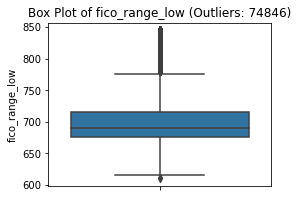

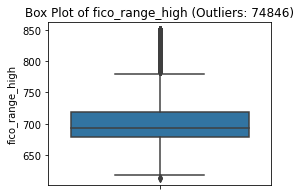

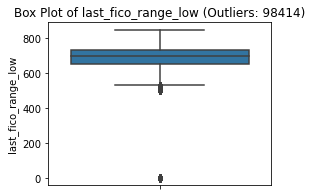

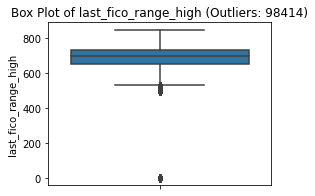

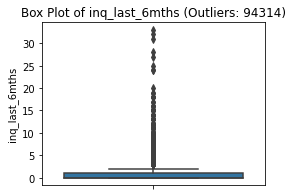

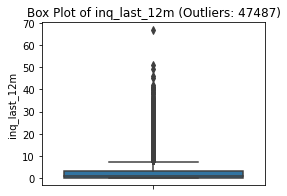

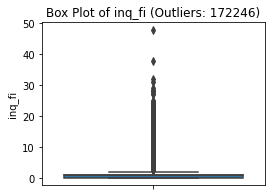

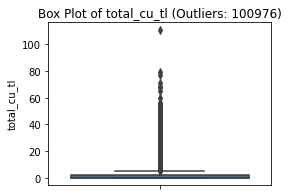

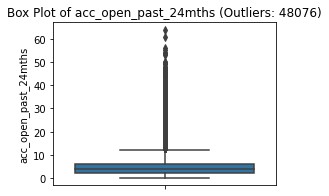

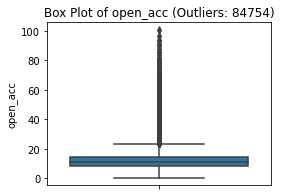

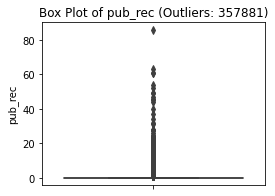

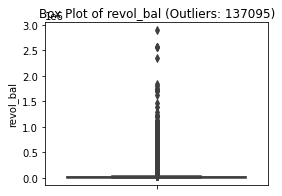

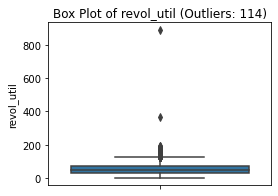

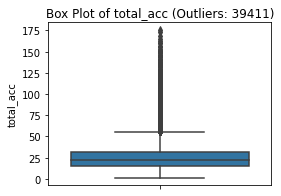

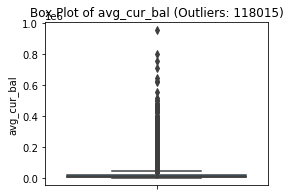

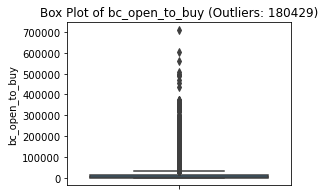

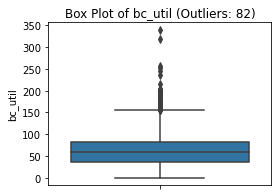

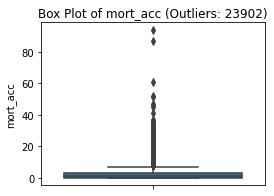

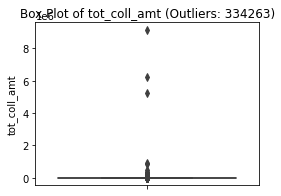

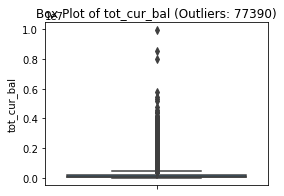

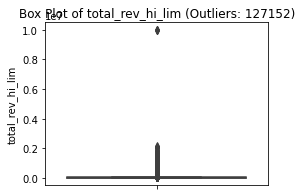

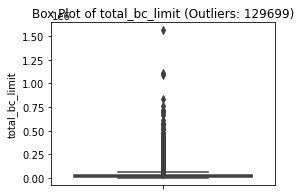

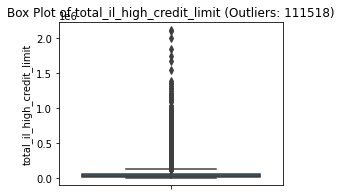

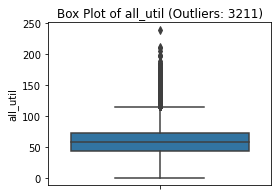

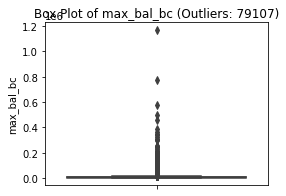

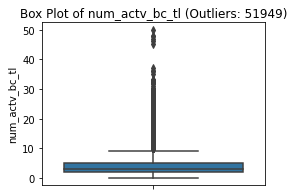

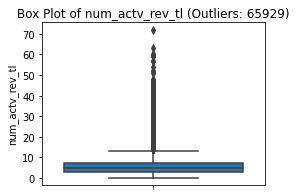

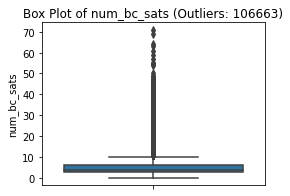

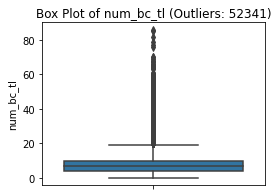

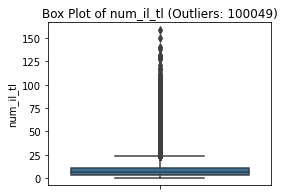

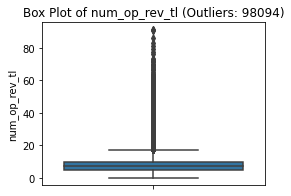

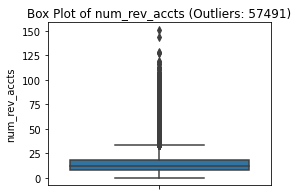

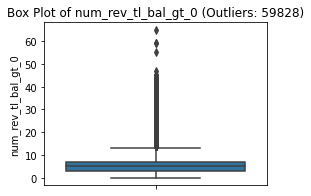

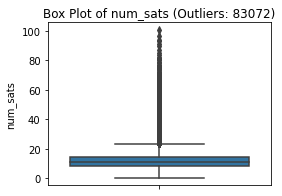

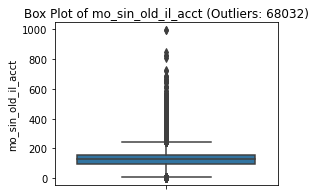

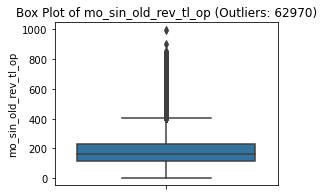

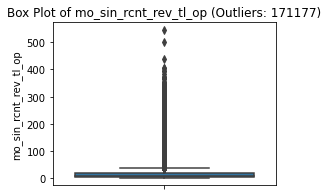

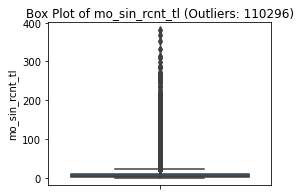

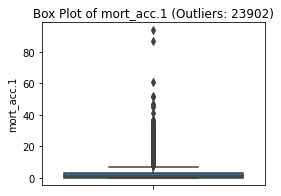

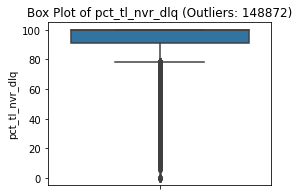

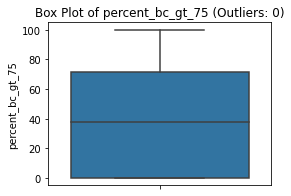

In [18]:
# Aykırı Değerleri Görselleştirdik.
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_df.columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=numerical_df[column])
    plt.title(f'Box Plot of {column} (Outliers: {outlier_counts.get(column, 0)})')
    plt.ylabel(column)
    plt.show()
    plt.close()

In [19]:
# non-numeric sutunlari belirledik
categorical_df = df_credit_history.select_dtypes(exclude=['number'])
display(categorical_df.head())
display(categorical_df.columns)

,id,earliest_cr_line
0,68407277,2003-08-01
1,68355089,1999-12-01
2,68341763,2000-08-01
3,66310712,2008-09-01
4,68476807,1998-06-01


Index(['id', 'earliest_cr_line'], dtype='object')

In [20]:
#df_credit_history.to_csv('credit_history_cleaned.csv', index=False)

## The Most Common FICO Range for Approved Loans

In [21]:
# Calculate the average FICO score
df_credit_history['average_fico_score'] = (df_credit_history['fico_range_low'] + df_credit_history['fico_range_high']) / 2

# Display the first few rows with the new column
display(df_credit_history[['fico_range_low', 'fico_range_high', 'average_fico_score']].head())

,fico_range_low,fico_range_high,average_fico_score
0,675.0,679.0,677.0
1,715.0,719.0,717.0
2,695.0,699.0,697.0
3,785.0,789.0,787.0
4,695.0,699.0,697.0


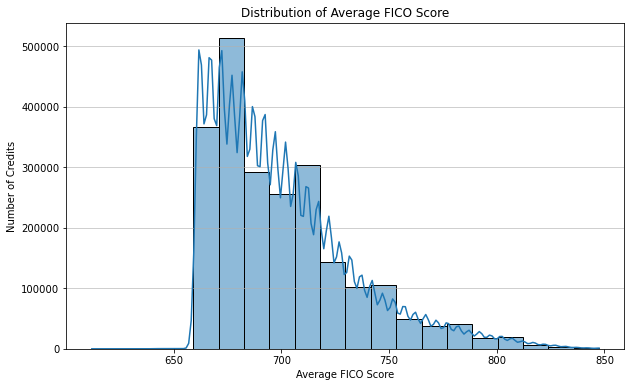

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_credit_history['average_fico_score'], bins=20, kde=True)
plt.title('Distribution of Average FICO Score')
plt.xlabel('Average FICO Score')
plt.ylabel('Number of Credits')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Most people fall into the low–medium score band.

- In the dataset, the highest number of applications come from individuals with an average FICO score of around ~670.

    - This indicates that the credit portfolio is largely composed of medium-risk profiles.
  
- The dataset suggests that it represents a medium segment rather than a high-credit-quality customer base.


## Revolving Utilization Rate Distribution

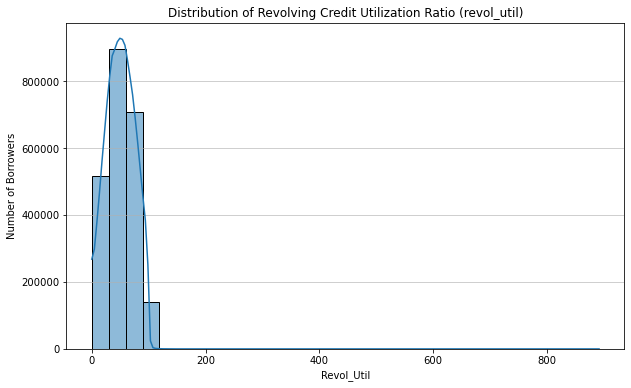

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

np.random.seed(42)
random.seed(42)

plt.figure(figsize=(10, 6))
sns.histplot(df_credit_history['revol_util'], bins=30, kde=True)
plt.title('Distribution of Revolving Credit Utilization Ratio (revol_util)')
plt.xlabel('Revol_Util')
plt.ylabel('Number of Borrowers')
plt.grid(axis='y', alpha=0.75)
plt.show()

📊 Distribution of Revolving Credit Utilization

✅ Insights and Financial Interpretation
The key insights that can be derived from this distribution are as follows:

1. Risk Profile and Overall Utilization Trend

Average Borrower:
The majority of borrowers use a moderate portion of their credit limits (around 40%–60%). This indicates that borrowers have access to credit and actively use it, but most are not maxing out their limits.

Indicator of Financial Health:
A peak around 50% suggests a balanced financial profile—borrowers are neither overly conservative (very low utilization) nor overly leveraged (very high utilization).

2. Implications for Credit Risk

High-Risk Group (High Utilization):
Borrowers with utilization rates of 80% and above are typically associated with higher default risk due to being close to their credit limits. In this chart, the fact that this group represents a small portion of the entire portfolio is a positive sign for overall risk mitigation.

Low-Risk / New Borrowers (Low Utilization):
Borrowers with utilization rates below 20% are generally considered low-risk, as they have low credit dependency or higher available credit limits.

3. Model Development and Segmentation

Model Focus:
In credit risk modeling (e.g., a scorecard), accurately distinguishing borrowers in the 40%–70% utilization range is crucial, as this segment represents the densest part of the dataset.

Outlier Management:
Values exceeding 100% are outliers. These should be capped or transformed before training the model, as they distort the distribution and may harm model performance.

4. Business Strategy

Limit Increase Targeting:
Borrowers in the 20%–40% range may be high-potential growth customers who can be targeted with credit limit increase offers to encourage higher utilization.

This histogram provides a clear and powerful first view of borrowers’ credit usage behavior within the dataset.

## Open Credit Accounts Count Distribution

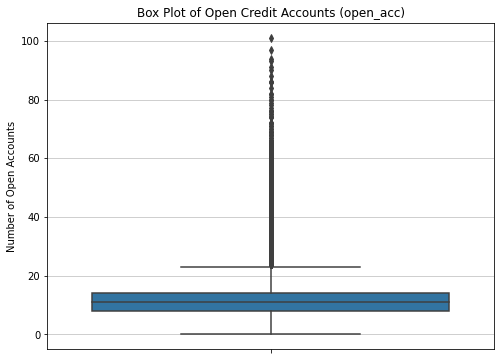

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_credit_history['open_acc'])
plt.title('Box Plot of Open Credit Accounts (open_acc)')
plt.ylabel('Number of Open Accounts')
plt.grid(axis='y', alpha=0.75)
plt.show()

✅ Insights and Financial Interpretation

The key insights derived from this distribution are as follows:

1. Credit Experience and Portfolio Structure

• Standard Experience:
The majority of borrowers (the central 50%) have between 9 and 15 open credit accounts, indicating an active and experienced consumer group within the banking system.

• New/Low-Experience Borrowers:
The lower whisker being close to zero shows that the dataset also includes borrowers who are new to credit or have limited access to financial products.

2. Risk Profile (High Number of Accounts)

• Borrowers with Excessive Credit Access (Outliers):
Having more than 25 open accounts—especially 50 or more—is notable. This can be interpreted in two ways:

High Risk:
These borrowers may be considered higher risk due to excessive credit dependence or difficulty managing multiple credit lines (overextension/debt stress).

High Net Worth (Less Common):
In rare cases, this could represent borrowers with very high net worth who obtain credit lines from many institutions and pose little risk
(although credit risk models typically assume the first scenario).

3. Model Development and Data Cleaning

• Importance:
The open_acc variable provides meaningful insight into a borrower’s level of financial activity and experience at the time of application, making it a valuable predictor in credit risk modeling.

• Outlier Management:
Outliers (25 and above) heavily distort the distribution. During model development, applying capping or a logarithmic transformation may be necessary to improve model performance.

4. Business Strategy

• Limit Policy:
A credit institution may adopt a more cautious credit limit allocation strategy for applicants with more than 20 open accounts.

This box plot clearly shows that the vast majority of borrowers fall within a certain range, while only a small minority have an unusually high number of open accounts.

## Financial Experience Level of Borrowers
Borrower’s First Credit Account Opening Date Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a reference date (e.g., end of 2023) to calculate credit line age
reference_date = pd.to_datetime('2023-12-31')

# Calculate the age of the credit line in years
df_credit_history['credit_line_age_years'] = (reference_date - df_credit_history['earliest_cr_line']).dt.days / 365.25

# Display the first few rows with the new column
display(df_credit_history[['earliest_cr_line', 'credit_line_age_years']].head())

,earliest_cr_line,credit_line_age_years
0,2003-08-01,20.416153
1,1999-12-01,24.082136
2,2000-08-01,23.414100
3,2008-09-01,15.329227
4,1998-06-01,25.582478


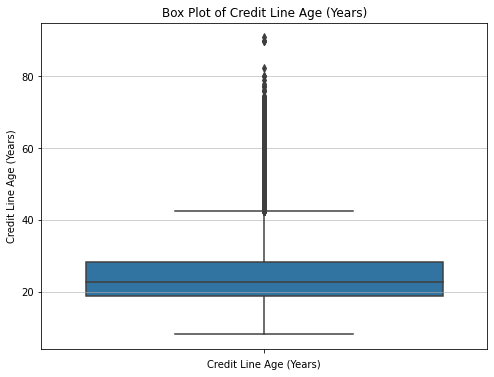

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_credit_history['credit_line_age_years'])
plt.title('Box Plot of Credit Line Age (Years)')
plt.xlabel('Credit Line Age (Years)')
plt.ylabel('Credit Line Age (Years)')
plt.grid(axis='y', alpha=0.75)
plt.show()

✅ Insights and Financial Interpretation

1. Credit Risk Implications

• Low-Risk Portfolio:
The most striking insight is that the median credit history length is approximately 25 years. Credit history length is strongly associated with financial stability and lower default risk. This indicates that the portfolio largely represents a very experienced and low-risk borrower group.

• Experience Classification:
Borrowers with less than 11 years of credit history (below the lower whisker) can be considered the newest — and potentially the riskiest — subgroup within this portfolio.

2. Model Development and Segmentation

• Strong Predictor:
The age of the credit line is one of the strongest predictors in credit scoring models. The narrow IQR (21–29 years) in this portfolio suggests that the model must be sensitive enough to capture subtle variations within this range.

• Outliers:
Extremely high values, such as 60–75 years, may represent institutions with very long record-keeping histories or very old individuals. During model development, these outliers should be examined carefully and may need to be capped (e.g., at 42 or 50 years).

3. Business Strategy

• Customer Loyalty:
A borrower who has kept a credit line open for 25 years demonstrates strong loyalty and long-term engagement potential. Such customers may be ideal targets for personalized offers or premium services.

• Defining New Customers:
The bank may classify customers with less than 11 years of credit history as “new customers,” and design separate risk management or product strategies tailored to this group.

This analysis clearly shows that the borrowers have a stable and well-established credit history.